<a href="https://colab.research.google.com/github/HJoonKwon/ml_fundamentals/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from collections import Counter 

In [21]:
train_data = pd.read_csv("titanic_dataset/train.csv")

In [22]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.00,0,0,SC/Paris 2163,12.8750,D,C
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.00,1,6,CA 2144,46.9000,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.00,0,0,113798,31.0000,NaN,C
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,W./C. 6608,34.3750,NaN,S
314,315,0,2,"Hart, Mr. Benjamin",male,43.00,1,1,F.C.C. 13529,26.2500,NaN,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.00,1,0,113806,53.1000,E8,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S


In [23]:
train_data = train_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].copy()
train_data.dropna(inplace=True)
train_data.sample(10)

,Survived,Pclass,Sex,Age,Fare,Embarked
645,1,1,male,48.0,76.7292,C
191,0,2,male,19.0,13.0000,S
59,0,3,male,11.0,46.9000,S
37,0,3,male,21.0,8.0500,S
422,0,3,male,29.0,7.8750,S
331,0,1,male,45.5,28.5000,S
316,1,2,female,24.0,26.0000,S
841,0,2,male,16.0,10.5000,S
689,1,1,female,15.0,211.3375,S
532,0,3,male,17.0,7.2292,C


In [24]:
print(len(train_data))

712


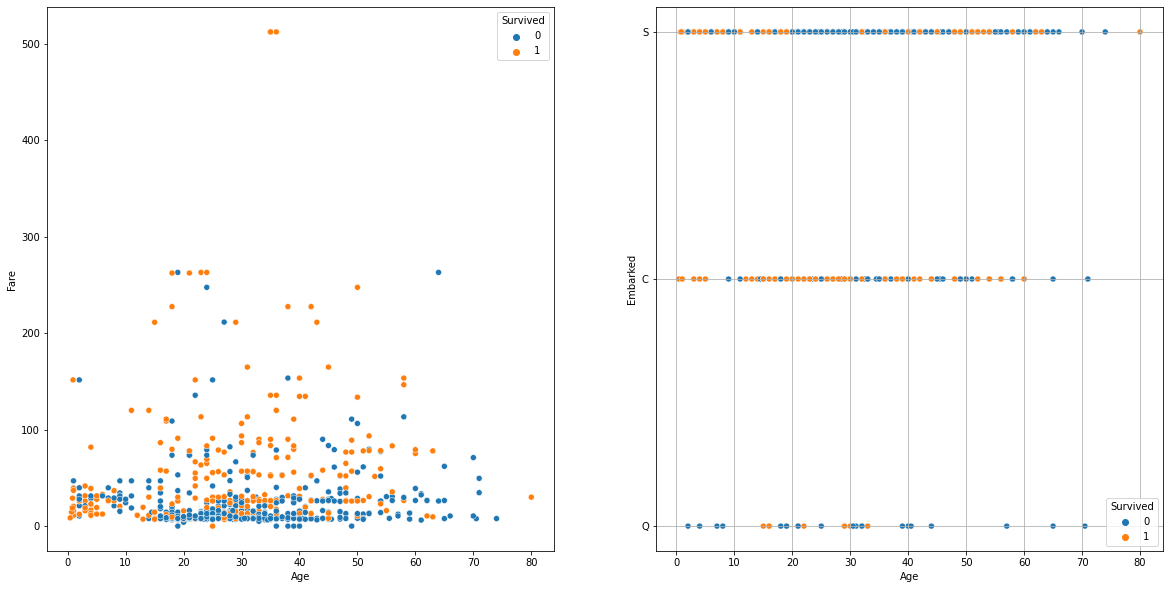

In [26]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.scatterplot(y='Fare', x='Age', data=train_data, hue='Survived')
plt.subplot(1,2,2)
sns.scatterplot(y='Embarked', x='Age', data=train_data, hue='Survived')
plt.grid()
plt.show()


In [ ]:
class Node:
  def __init__(self, 
               y: list, 
               x: pd.DataFrame, 
               min_samples_split: int = 20,
               max_depth: int = 5,
               depth: int = 0,
               node_type: str = 'root',
               rule: str = ""):
    
    self.x = x 
    self.y = y 

    self.min_samples_split = min_samples_split 
    self.max_depth = max_depth
    self.depth = depth
    self.node_type = node_type 
    self.rule = rule 

    self.counts = Counter(y)

    self.features = list(self.x.columns)
    self.numeric_features = [] 
    self.category_features = [] 
    for feature in self.features:
      if type(x[feature].values[0]) == float:
        self.numeric_features.append(feature)
      else:
        self.category_features.append(feature)


    self.gini_impurity = self.get_GINI()

    counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

    yhat = None 
    if len(counts_sorted) > 0:
      yhat = counts_sorted[-1][0] # major class of the node 
    
    self.yhat = yhat 

    self.n = len(y)
    self.left = None 
    self.right = None 

    self.best_feature = None
    self.best_value = None 


  def get_GINI(self):
    y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)
    return self.GINI_impurity(y1_count, y2_count)

  @staticmethod
  def GINI_impurity(y1_count: int, y2_count: int) -> float:
    if y1_count is None:
      y1_count = 0 
    if y2_count is None:
      y2_count = 0 
    
    total_n = y1_count + y2_count 
    if total_n == 0:
      return 0.0 
    
    p1 = y1_count / total_n 
    p2 = y2_count / total_n

    gini = 1 - p1**2 - p2**2 
    return gini 
  
  @staticmethod
  def moving_average(x: np.ndarray, window: int) -> np.ndarray:
    return np.convolve(x, np.ones(window), 'valid') / window
  
  def best_split(self) -> tuple:

    df = self.x.copy()
    df['y'] = self.y

    gini_root = self.get_GINI()

    max_gain = 0 

    best_feature = None
    best_value = None 

    for feature in self.numeric_features:
      x_df = df.dropna().sort_values(feature)

    for feature in self.category_features:
      continue 

    return ()

    

## References 
- https://towardsdatascience.com/decision-tree-algorithm-in-python-from-scratch-8c43f0e40173
- https://github.com/Eligijus112/decision-tree-python/blob/main/DecisionTree.py
- https://github.com/Eligijus112/decision-tree-python/blob/main/Decistion-tree.ipynb

In [6]:
!ls

sample_data  titanic_dataset
